In [255]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import calendar
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings('ignore')

In [2]:
file = ".//Data//Small_Data//offline_sales.json"

In [3]:
## Create DF with offline data
df = pd.read_json(file, lines=True, dtype={'customer_id': str})
## Read customer_id as string to deal with big numbers

# 1.0 - Exploratory Data Analysis | Análise Exploratória de Dados

In [4]:
## Checking DF
df.head(10)

,date,state,store_id,sale_id,off_product_id,quantity,price,customer_id
0,2018-08-01,RN,3162633,323932636465316,643839313230323,1,279.0,None
1,2018-08-01,RN,3162633,326463633336323,613665646663346,1,229.0,None
2,2018-08-01,RN,3162633,333331346330323,343739666265353,1,179.0,None
3,2018-08-01,RN,3162633,393461383633336,373034633762613,1,269.0,None
4,2018-08-01,RN,3162633,616531626536373,343634373062363,1,29.0,None
5,2018-08-01,RN,3162633,626462353638383,616339353035393,1,459.0,None
6,2018-08-01,RN,3162633,653363623539323,346165376638356,1,369.0,None
7,2018-08-01,RN,3162633,666639323036376,643839313363376,1,149.0,30373934343338363136
8,2018-08-01,RN,3162633,636238633865636,333835396465353,1,198.0,30393833353363303832
9,2018-08-01,RN,3162633,626239383061353,343332613639373,1,229.0,31366262653431626130


In [5]:
## Replace None to NaN
df.customer_id.replace('None', np.nan, inplace=True)

In [6]:
## Total Entries
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29372 entries, 0 to 29371
Data columns (total 8 columns):
date              29372 non-null datetime64[ns]
state             29372 non-null object
store_id          29372 non-null int64
sale_id           29372 non-null int64
off_product_id    29372 non-null int64
quantity          29372 non-null int64
price             29372 non-null float64
customer_id       25844 non-null object
dtypes: datetime64[ns](1), float64(1), int64(4), object(2)
memory usage: 1.8+ MB


**29372 rows, 8 columns**

In [7]:
## Check dtypes
df.dtypes

date              datetime64[ns]
state                     object
store_id                   int64
sale_id                    int64
off_product_id             int64
quantity                   int64
price                    float64
customer_id               object
dtype: object

In [8]:
print('Dia Inicial:',df.date.min())
print('Dia Final:',df.date.max())

Dia Inicial: 2018-08-01 00:00:00
Dia Final: 2018-08-31 00:00:00


**Período de Coleta = Agosto 2018**

In [9]:
## Checando Correspondencias de Estados
df.state.value_counts()

RJ    8867
SP    6123
RS    4631
PE    3289
AM    1527
RN    1472
MA    1078
PR     888
PI     834
MS     361
GO     302
Name: state, dtype: int64

**Estado mais frequente (provavel estado que consome mais) = RJ**

In [10]:
## Quantas lojas fisicas existem
len(df.store_id.unique())

39

In [11]:
## Quantas Lojas Fisicas existem em Cada estado?
store_state = df.groupby(['state','store_id']).sum().reset_index().state.value_counts()

In [12]:
store_state

RJ    13
SP    10
PE     3
RS     3
PR     3
AM     2
PI     1
MS     1
RN     1
MA     1
GO     1
Name: state, dtype: int64

# 2.0 - Preparation | Preparação

## 2.1 Data Cleaning - NaN | Limpeza de Dados - NaN

In [13]:
## Checking for NaN values
df.isnull().sum()

date                 0
state                0
store_id             0
sale_id              0
off_product_id       0
quantity             0
price                0
customer_id       3528
dtype: int64

**3528 NaN values on customer_id column**  
**Clean or manipulate this**  
**12% of costumer_id is Empty**

In [14]:
## Create DF with no null values (not best aproach but the missing Data is ID's, what do with this?)
no_null = df.copy()
no_null.dropna(axis=0, inplace=True)
no_null.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25844 entries, 7 to 29371
Data columns (total 8 columns):
date              25844 non-null datetime64[ns]
state             25844 non-null object
store_id          25844 non-null int64
sale_id           25844 non-null int64
off_product_id    25844 non-null int64
quantity          25844 non-null int64
price             25844 non-null float64
customer_id       25844 non-null object
dtypes: datetime64[ns](1), float64(1), int64(4), object(2)
memory usage: 1.8+ MB


In [15]:
## Drop old Index Column and Create a new one
no_null = no_null.reset_index().drop(columns=['index'])
no_null.head()

,date,state,store_id,sale_id,off_product_id,quantity,price,customer_id
0,2018-08-01,RN,3162633,666639323036376,643839313363376,1,149.0,30373934343338363136
1,2018-08-01,RN,3162633,636238633865636,333835396465353,1,198.0,30393833353363303832
2,2018-08-01,RN,3162633,626239383061353,343332613639373,1,229.0,31366262653431626130
3,2018-08-01,RN,3162633,376465626630613,306439363765386,1,58.0,32653962626632373464
4,2018-08-01,RN,3162633,666564646366383,336139376666306,1,58.0,34653761646637306265


## 2.2 Data Cleaning - Outliers | Limpeza de Dados - Outliers

In [16]:
## Check Outliers on Quantity Colunm
print('Max:',df.quantity.max())
print('Min:',df.quantity.min())

Max: 9
Min: 1


In [17]:
print('Media:',df.quantity.mean())
print('Mediana:',df.quantity.median())

Media: 1.0227427481955604
Mediana: 1.0


In [18]:
## Maior parte das pessoas compra apenas um item mesmo
df.quantity.value_counts()

1    28784
2      531
3       43
4       10
5        2
9        1
6        1
Name: quantity, dtype: int64

**Valores aceitaveis**

In [19]:
## Check Outliers on Price
df.price.describe()

count    29372.000000
mean       468.062785
std        819.182618
min          0.010000
25%        168.000000
50%        289.000000
75%        589.000000
max      39690.000000
Name: price, dtype: float64

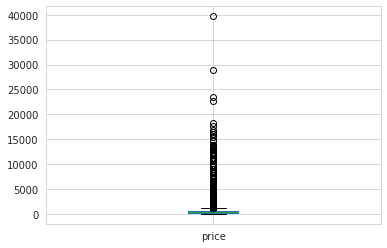

In [20]:
df.price.plot(kind='box')

**Grande quantidade de valores grandes**


In [21]:
## Check the median because the mean may be altered by the large price values 
no_null.price.median()

289.0

**Mediana = 289, isso mostra que a media dos preços tende a subir devido as compras de alto valor, o gasto de usuários comuns (gastos mais frequentes) são representados melhor pela mediana**  
**Por enquanto irei manter os valores altos por completo**

## 2.3 Data Cleaning - Duplicated | Limpeza de Dados - Duplicados 

In [22]:
no_null.duplicated(['sale_id'])

0        False
1        False
2        False
3        False
4        False
         ...  
25839    False
25840     True
25841    False
25842     True
25843     True
Length: 25844, dtype: bool

**Pode haver o mesmo 'sale_id' para diversos produtos, logo essas duplicadas não são problemáticas**

In [23]:
## Verificar dados duplicados
no_null.duplicated().sum()

0

**Sem linhas completas duplicadas**

# 3.0 - Análises

In [24]:
## Cria coluna de dia da semana da compra (0 segunda -> 6 domingo )
no_null['weekday'] =  no_null['date'].dt.dayofweek
df['weekday'] = df['date'].dt.dayofweek

## 3.1 - Faturamentos  
**Hipótes**      
**Os IDs dos clientes faltantes no DF completo são devidos à algum problema na coleta APENAS do ID do cliente, logo isso nao influência o faturamento**  
  
**Caso essa ausência de valor esteja ligada à algum tipo de problema que possa comprometer o restante dos dados, o melhor seria a utilização do dataframe sem os valores nulos**

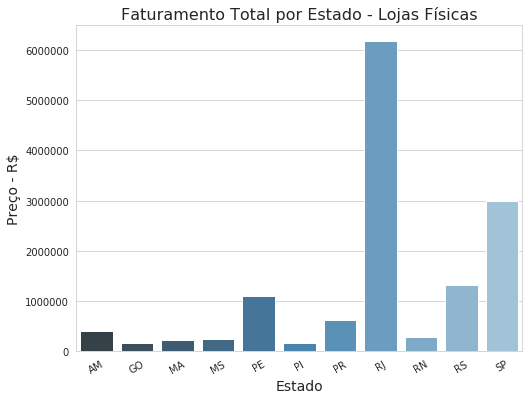

In [25]:
## Plotar Faturamento Total por Estado
plt.figure(figsize=(8,6))
ax = sns.barplot(x='state',y='price', data=df.groupby('state').sum().reset_index(), palette='Blues_d')
ax.set_xlabel('Estado', fontsize=14)
ax.set_ylabel('Preço - R$', fontsize=14)
ax.set_title('Faturamento Total por Estado - Lojas Físicas', fontsize=16)

for item in ax.get_xticklabels():
    item.set_rotation(30)
    
plt.savefig('./Images/Offline/Revenue-States-Offline.jpg')

In [26]:
## Faturamento Total (Usar o DataFrame completo, com os valores nulos)
print('Faturamento total no mes de agosto em 2018:',df.price.sum())
print('Faturamento total de usuários identificados: ', no_null.price.sum())

fat_total = df.price.sum()
fat_id = no_null.price.sum()

Faturamento total no mes de agosto em 2018: 13747940.13
Faturamento total de usuários identificados:  12202226.879999999


In [27]:
df.head()

,date,state,store_id,sale_id,off_product_id,quantity,price,customer_id,weekday
0,2018-08-01,RN,3162633,323932636465316,643839313230323,1,279.0,NaN,2
1,2018-08-01,RN,3162633,326463633336323,613665646663346,1,229.0,NaN,2
2,2018-08-01,RN,3162633,333331346330323,343739666265353,1,179.0,NaN,2
3,2018-08-01,RN,3162633,393461383633336,373034633762613,1,269.0,NaN,2
4,2018-08-01,RN,3162633,616531626536373,343634373062363,1,29.0,NaN,2


In [28]:
## Numero de Lojas
df.store_id.value_counts().count()

39

In [29]:
## Lojas com maior e menor faturamento
group = df.groupby('store_id').sum()
index_max = int(group[group.price==group.price.max()].reset_index()['store_id'].values)
index_min = int(group[group.price==group.price.min()].reset_index()['store_id'].values)

print('Loja com maior faturamento id:',index_max,'-',df[df.store_id==index_max].state.values[0])
print('Loja com menor faturamento id:',index_min,'-',df[df.store_id==index_min].state.values[0])

maior = str(index_max)+'-'+str(df[df.store_id==index_max].state.values[0])
menor = str(index_min)+'-'+str(df[df.store_id==index_min].state.values[0])

Loja com maior faturamento id: 6361373 - RJ
Loja com menor faturamento id: 3234666 - RJ


**Tanto a loja com maior quanto a com menor faturamento estão no RJ**

In [30]:
fat_time = df.groupby('date').sum().reset_index()

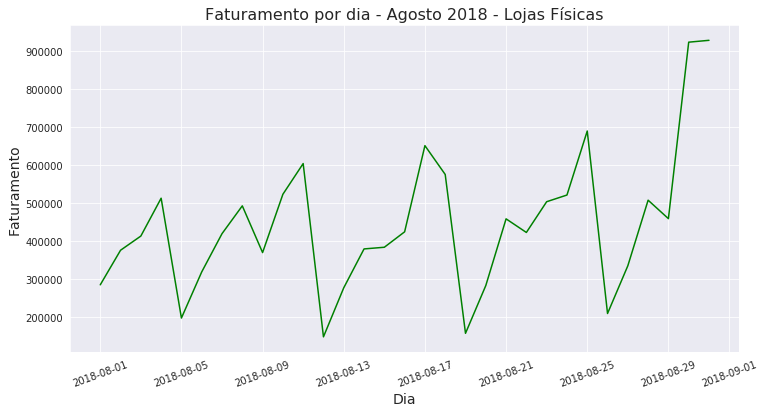

In [31]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,6))
ax1 = sns.lineplot(x='date',y='price',data=fat_time, color='green')
ax1.set_xlabel('Dia', fontsize=14)
ax1.set_ylabel('Faturamento', fontsize=14)
ax1.set_title('Faturamento por dia - Agosto 2018 - Lojas Físicas', fontsize=16)

for item in ax1.get_xticklabels():
    item.set_rotation(20)
    
plt.savefig('./Images/Offline/Revenue-Offline.jpg', bbox_inches="tight")

In [32]:
datas = list(fat_time.date)
dias = []
for data in datas:
    dias.append(data.day)

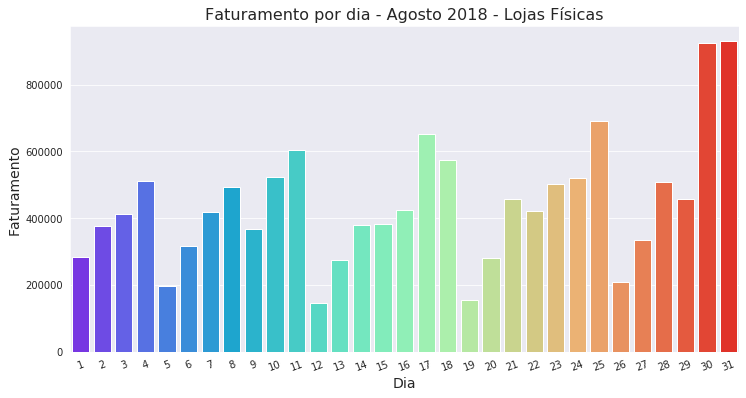

In [33]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,6))
ax1 = sns.barplot(x='date',y='price',data=fat_time, palette='rainbow')
ax1.set_xlabel('Dia', fontsize=14)
ax1.set_ylabel('Faturamento', fontsize=14)
ax1.set_title('Faturamento por dia - Agosto 2018 - Lojas Físicas', fontsize=16)
ax1.set_xticklabels(dias)

for item in ax1.get_xticklabels():
    item.set_rotation(20)
    
plt.savefig('./Images/Offline/Revenue-Offline-Bar.jpg', bbox_inches="tight")

In [34]:
## Faturamento total finais de semana / dia da semana
aux_fat = df.groupby('weekday').sum().reset_index()
fat_weekend = aux_fat[(aux_fat.weekday==6) | (aux_fat.weekday==5)].price.sum()
fat_week = aux_fat[(aux_fat.weekday!=6) | (aux_fat.weekday!=5)].price.sum()

In [35]:
most_sold_day = calendar.day_name[int(aux_fat[aux_fat.price==aux_fat.price.max()].weekday.values)]

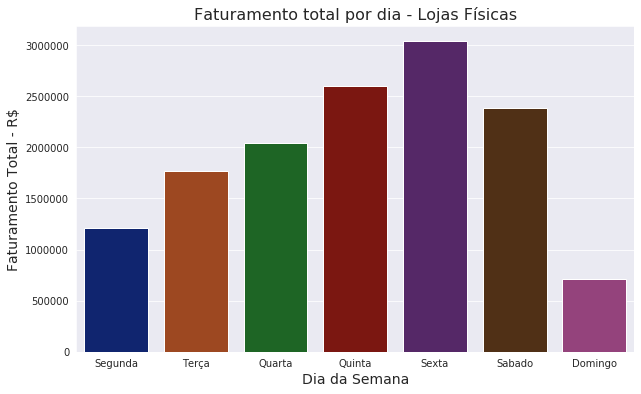

In [36]:
## Faturamento Total por dia da semana
plt.figure(figsize=(10,6))
ax1 = sns.barplot(x='weekday',y='price', data= aux_fat, ci=0, palette='dark')
ax1.set_xlabel('Dia da Semana', fontsize=14)
ax1.set_ylabel('Faturamento Total - R$', fontsize=14)
ax1.set_xticklabels(['Segunda','Terça','Quarta','Quinta','Sexta','Sabado','Domingo'])
ax1.set_title('Faturamento total por dia - Lojas Físicas', fontsize=16)
plt.savefig('./Images/Offline/Revenue-Day-Total-Offline.jpg')

## 3.3 - Análise de Vendas // Dias da semana

In [37]:
## Numero total de ordens emitidas
n_vendas = len(df.groupby('sale_id').sum())

In [38]:
## Verificar vendas no fim de semana (selecionar por sale_id unico)
cariocas = df[df.state=='RJ']
# Numero de vendas na semana e fim de semana (Offline)
total = cariocas.drop_duplicates(subset=['sale_id']).sale_id.count()
fim = cariocas[(cariocas.weekday==6) | (cariocas.weekday==5)].drop_duplicates(subset=['sale_id']).sale_id.count()
normal =cariocas[(cariocas.weekday!=6) & (cariocas.weekday!=5)].drop_duplicates(subset=['sale_id']).sale_id.count()

In [39]:
print('Número total de vendas no final de semana:',fim)
print('Número total de vendas dias de semana:', normal)
print('Número total de compras:', total)

Número total de vendas no final de semana: 887
Número total de vendas dias de semana: 3514
Número total de compras: 4401


In [40]:
# Porcentagem da quantidade de compras dos cariocas no final de semana
pctg_vendas = (fim*100)/total
print('As compras dos cariocas no fim de semana representam:', pctg_vendas,'% das quantidade de compras total')

As compras dos cariocas no fim de semana representam: 20.15451033855942 % das quantidade de compras total


**Quantidade de compras representa gasto? Verificar**

In [233]:
## DataFrame com somatório do faturamento por dia da semana em cada estado
df_grupo = df.groupby(['weekday','state']).sum().reset_index(['state','weekday'])

In [234]:
## Estados com maior faturamento
best_states = ['RJ','RS','SP','PE']
## DataFrame filtrado pela lista dos melhores estados
df_dias = df_grupo[df_grupo.state.isin(best_states)]

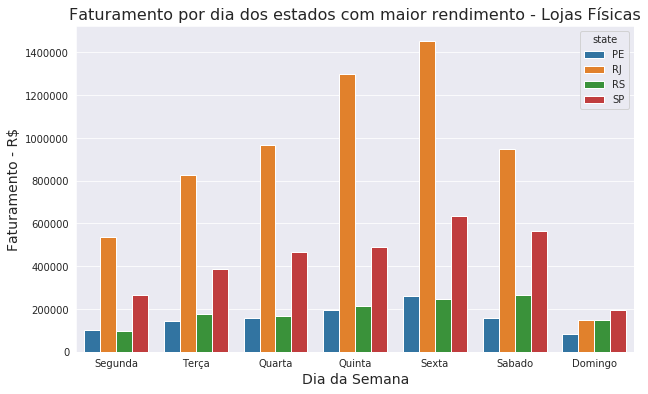

In [235]:
## Plot de faturamento por dia dos melhores estados
plt.figure(figsize=(10,6))
ax1 = sns.barplot(x='weekday',y='price', hue='state', data= df_dias, ci=0, palette='tab10')
ax1.set_xlabel('Dia da Semana', fontsize=14)
ax1.set_ylabel('Faturamento - R$', fontsize=14)
ax1.set_xticklabels(['Segunda','Terça','Quarta','Quinta','Sexta','Sabado','Domingo'])
ax1.set_title('Faturamento por dia dos estados com maior rendimento - Lojas Físicas', fontsize=16)
plt.savefig('./Images/Offline/Revenue-Day-Bests-Offline.jpg')

In [176]:
## Verifica Quantos dias existiram de cada no mes
datas = df.groupby('date').count().reset_index().date

In [182]:
dias = []
for data in datas:
    dias.append(data.weekday())
dias = pd.Series(dias)
dias.value_counts()

4    5
3    5
2    5
6    4
5    4
1    4
0    4
dtype: int64

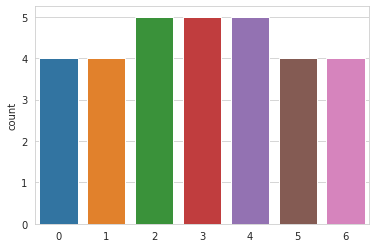

In [267]:
sns.countplot(x=dias)

**Quarta, Quinta e Sexta ocorreram uma vez a mais que os demais dias**  
**Utilizar a média do faturamento por dia da semana para melhor análise**

In [239]:
## Função pra realizar a média do faturamento por dia da semana
def get_mean(index):
    if df_dias.loc[index].weekday>=3 and df_dias.loc[index].weekday<=5:
        return df_dias.loc[index].price/5
    else:
        return df_dias.loc[index].price/4

In [268]:
## DataFrame auxiliar com a média do faturamento por dia da semana
df_mean = pd.DataFrame(columns=['state','weekday','price'])
for index, row in df_dias.iterrows():
    size = len(df_mean)
    estado = df_dias.loc[index].state
    weekday = df_dias.loc[index].weekday
    price = get_mean(index)
    
    df_mean = df_mean.set_value(size,'state',estado) 
    df_mean = df_mean.set_value(size,'weekday',weekday)
    df_mean = df_mean.set_value(size,'price',price)


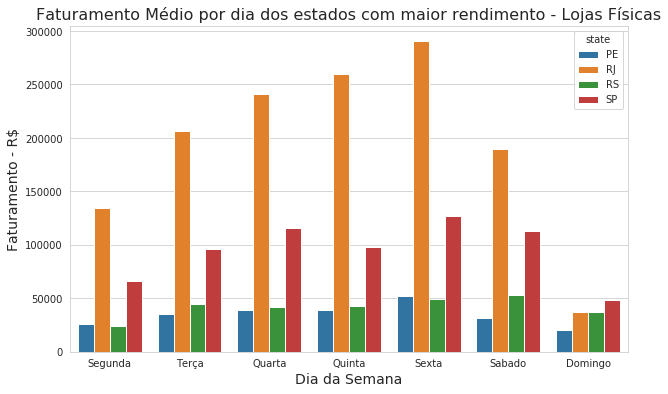

In [269]:
## Plot de faturamento por dia dos melhores estados
plt.figure(figsize=(10,6))
ax1 = sns.barplot(x='weekday',y='price', hue='state', data= df_mean, ci=0, palette='tab10')
ax1.set_xlabel('Dia da Semana', fontsize=14)
ax1.set_ylabel('Faturamento - R$', fontsize=14)
ax1.set_xticklabels(['Segunda','Terça','Quarta','Quinta','Sexta','Sabado','Domingo'])
ax1.set_title('Faturamento Médio por dia dos estados com maior rendimento - Lojas Físicas', fontsize=16)
plt.savefig('./Images/Offline/Revenue-Day-Mean-Bests-Offline.jpg')

**Dias da semana com maior média de faturamento no RJ -> Sexta > Quinta > Quarta**

In [343]:
my_aux = df.groupby(['store_id','state','weekday']).sum()
my_aux.reset_index(inplace=True)

my_aux1 = my_aux[(my_aux.weekday==6) | (my_aux.weekday==5)].groupby(['store_id','state','weekday']).sum()

my_aux2 = my_aux[(my_aux.weekday!=6) | (my_aux.weekday!=5)].groupby(['store_id','state','weekday']).sum()



array([3161323, 3162633, 3234626, 3234666, 3237386, 3339656, 3361343,
       3464653, 3530643, 3531656, 3561373, 3561633, 3561636, 3565343,
       3639343, 3639373, 3662633, 3665663, 3861323, 3861653, 3864336,
       3864393, 3964313, 3966336, 6161333, 6234643, 6236393, 6264376,
       6361373, 6366316, 6533396, 6564636, 6635613, 6637353])

In [346]:
print('Quantidade de lojas que abrem no Domingo: ', len(my_aux[my_aux.weekday==6].store_id.unique()))
print('Quantidade de lojas que abrem nos dias de semana: ', len(my_aux2.reset_index().store_id.unique()))

Quantidade de lojas que abrem no Domingo:  34
Quantidade de lojas que abrem nos dias de semana:  39


In [270]:
store_week = cariocas.groupby(['store_id', 'weekday']).sum()

In [271]:
store_week.reset_index(inplace=True)

In [272]:
## Total Gasto no RJ em todos finais de Semana de agosto de 2018
spend_end = store_week[(store_week.weekday==5) | (store_week.weekday==6)].price.sum()
print('Total Gasto nos finais de Semana: R$', spend_end)

Total Gasto nos finais de Semana: R$ 1097666.58


In [273]:
## Total Gasto
spend_total = store_week.price.sum()
print('Gasto total: R$', spend_total)

Gasto total: R$ 6179551.72


In [274]:
pctg_spend = (spend_end*100)/spend_total
print('O valor das compras dos cariocas no fim de semana representam:', pctg_spend,'% do valor total das compras')

O valor das compras dos cariocas no fim de semana representam: 17.762883615771404 % do valor total das compras


# 4.0 - Exportando Resultados para CSV

## 4.1 Criar DataFrames de Saída

In [275]:
## Criar DataFrame
datas = {'faturamento_total':[fat_total], 'faturamento_id':[fat_id],'n_total_vendas':[n_vendas],'fat_fds':[fat_weekend]
         ,'fat_semana':[fat_week],'loja_maior_faturamento': [maior],'loja_menor_faturamento':[menor],
         'dia_maior_fat':[most_sold_day],'total_vendas_fdsRJ': [fim], 'total_vendas_semanaRJ':[normal], 
         'total_vendasRJ': [total],'perct_vendas_fdsRJ': [round(pctg_vendas,2)], 'gastos_fdsRJ':[spend_end], 
         'gastos_totalRJ': [spend_total], 'perct_gastos_fdsRJ':[round(pctg_spend,2)]}
df_offline = pd.DataFrame(data=datas)

In [276]:
## Tranposta DF para melhor legibilidade
pd.options.display.float_format = '{:20,.2f}'.format
transpose = df_offline.transpose()
transpose.columns = ['Valor']
transpose

,Valor
faturamento_total,"13,747,940.13"
faturamento_id,"12,202,226.88"
n_total_vendas,14619
fat_fds,"3,092,634.48"
fat_semana,"13,747,940.13"
loja_maior_faturamento,6361373-RJ
loja_menor_faturamento,3234666-RJ
dia_maior_fat,Friday
total_vendas_fdsRJ,887
total_vendas_semanaRJ,3514


### 4.2 Exportar DataFrames para CSV

In [277]:
## Exporta DataFrame de Saída em Colunas
df_offline.to_csv(r'./Outputs/Offline_Data/Off_Output_Horizontal.csv')
## Exporta DataFrame de Saída Transposto (em linhas)
transpose.to_csv(r'./Outputs/Offline_Data/Off_Output_Vertical.csv')

### 4.3 Exportar DataFrames para Excel

In [278]:
engine = 'openpyxl'
with pd.ExcelWriter("./Outputs/Offline_Data/Out-Off.xlsx", engine=engine) as writer:
    df_offline.to_excel(writer, sheet_name='Offline-H')
    transpose.to_excel(writer, sheet_name='Offline-V')